<a href="https://colab.research.google.com/github/saadkiet/CNN-for-Bank-Customer-Satisfaction/blob/master/CNN_for_Bank_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Installation and Setup


In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 24.1MB/s 
     |████████████████████████████████| 3.9MB 40.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c64efb9e566bd4a0ee638a09924a8ad7aa971c5345ace6fb95457473a383325f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 1.15.2 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.2 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existi

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#Step 2 : Importing dataset from Kaggle to Google Colab

In [0]:
# installing kaggle API
! pip install -q kaggle

In [0]:
# creating a directory as kaggle
! mkdir -p ~/.kaggle

In [0]:
# importing kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [0]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
# list of the datasets
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
unanimad/dataisbeautiful                                       Reddit - Data is Beautiful                           11MB  2020-03-21 22:28:28           1049        104  1.0              
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  646MB  2020-03-20 23:31:34          32305       4082  0.88235295       
rubenssjr/brasilian-houses-to-rent                             brazilian_houses_to_rent                            282KB  2020-03-25 22:51:17            994         49  1.0              
paultimothymooney/covid19-containment-and-mitigation-measures  CO

In [0]:
#Importing dataset from kaggale
! kaggle competitions download -c santander-customer-satisfaction

santander-customer-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#!pip uninstall -y kaggle
#!pip install --upgrade pip
#!pip install kaggle==1.5.6
#!kaggle -v

In [0]:
#unzipping dataset
! unzip /content/santander-customer-satisfaction.zip

Archive:  /content/santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [0]:
dataset=pd.read_csv("/content/train.csv")

In [0]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


#Step 3: Data pre processing

In [0]:
dataset.shape

(76020, 371)

In [0]:
# independent variables (Matrix of features)
x = dataset.drop(labels=['ID','TARGET'], axis=1)

In [0]:
# dependent variable
y = dataset['TARGET']

In [0]:
x.shape, y.shape

((76020, 369), (76020,))

In [0]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Step 4 : Step 4: Remove constant, Quasi constant and duplicate features

In [0]:
x_train.shape,x_test.shape

((60816, 369), (15204, 369))

*Constant Column* : When all values of a Column are the same.
So relation of Constant column with Output is almost none.

*Quasi Column* : When most of the observations in the column are the same but one or two observations are different. So it also doesnt correlated with the output.

*Duplicate column/feature* : When a column is repeated, its called Duplicate column or features.


so we have to remove these columns

In [0]:
from sklearn.feature_selection import VarianceThreshold

In [0]:
rm_f = VarianceThreshold(threshold=0.01) #here we are removing columns which have variance less than 1%
x_train=rm_f.fit_transform(x_train)
x_test=rm_f.transform(x_test)

In [0]:
x_train.shape, x_test.shape
#We can see columns have been dropped.

((60816, 266), (15204, 266))

In [0]:
print(369-266)
#103 columns have been dropped.

103

In [0]:
#Removing duplicate features.
x_train_t=x_train.T
x_test_t=x_test.T

In [0]:
x_train_t=pd.DataFrame(x_train_t)
x_test_t=pd.DataFrame(x_test_t)

In [0]:
x_train_t.shape,x_test_t.shape

((266, 60816), (266, 15204))

In [0]:
#Number of duplicate features
x_train_t.duplicated()

#False means not duplicated and True means duplicated.

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [0]:
x_train_t.duplicated().sum()
#16 columns are duplicate.

16

In [0]:
duplicated_features=x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [0]:
features_to_keep=[not i  for i in duplicated_features]
print(features_to_keep)

#we have to replace true with false and false with true.
#False values are removed

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [0]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [0]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [0]:
266-250

16

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [0]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [0]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [0]:
x_train=x_train.reshape(60816, 250,1)
x_test=x_test.reshape(15204, 250,1)
#data has been converted into 2D from 1D

We are doing this because CNN layer accepts data in this form only

In [0]:
#X_train and x_test are numpy array
#so we convert y_train and y_test into numpy
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [0]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [0]:
y_train.shape, y_test.shape

((60816,), (15204,))

#Step 5 : Building the model

In [0]:
# define an object
model = tf.keras.models.Sequential()

In [0]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape = (250, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization()) #due to batch normalization,batch training will be faster.

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [0]:
# third CNN layer
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [0]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [0]:
# first dense layer (fully connected layer)
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [0]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 248, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [0]:
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#Step 6: Training the model

In [0]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 99s 2ms/sample - loss: 0.2230 - accuracy: 0.9520 - val_loss: 0.1976 - val_accuracy: 0.9582
Epoch 2/10
60816/60816 [==============================] - 97s 2ms/sample - loss: 0.1747 - accuracy: 0.9597 - val_loss: 0.1891 - val_accuracy: 0.9582
Epoch 3/10
60816/60816 [==============================] - 96s 2ms/sample - loss: 0.1662 - accuracy: 0.9608 - val_loss: 0.1817 - val_accuracy: 0.9577
Epoch 4/10
60816/60816 [==============================] - 98s 2ms/sample - loss: 0.1618 - accuracy: 0.9609 - val_loss: 0.1809 - val_accuracy: 0.9578
Epoch 5/10
60816/60816 [==============================] - 99s 2ms/sample - loss: 0.1603 - accuracy: 0.9609 - val_loss: 0.1708 - val_accuracy: 0.9579
Epoch 6/10
60816/60816 [==============================] - 98s 2ms/sample - loss: 0.1568 - accuracy: 0.9610 - val_loss: 0.1651 - val_accuracy: 0.9582
Epoch 7/10
60816/60816 [==============================] 

In [0]:
# model predictions
y_pred = model.predict_classes(x_test)

In [0]:
print(y_pred[12]), print(y_test[12])

[0]
0


(None, None)

In [0]:
# confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14560    10]
 [  634     0]]


In [0]:
acc_cm = accuracy_score(y_test, y_pred)

In [0]:
print(acc_cm)

0.9576427255985267


#Step 7: Learning Curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

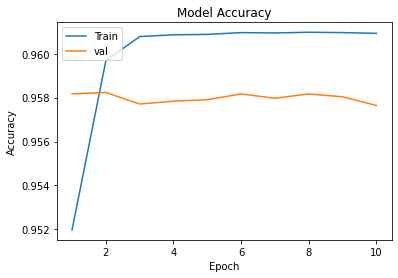

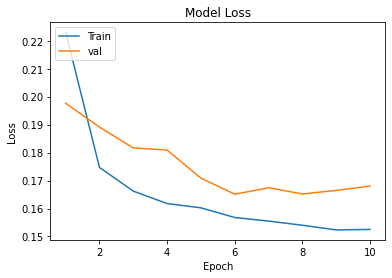

In [0]:
learning_curve(history, 10)